In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
Dataset = pd.read_csv('Clean_Dataset.csv')

In [3]:
Dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
Dataset = Dataset.drop('Unnamed: 0', axis=1)

In [5]:
Dataset = Dataset.drop('flight', axis=1)

In [6]:
Dataset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
Dataset.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
Dataset['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

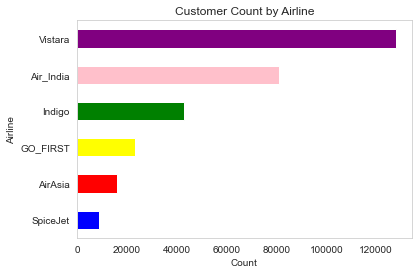

In [9]:
airline_counts = Dataset['airline'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['Blue', 'Red', 'Yellow', 'Green', 'Pink', 'Purple']

# Create horizontal bar chart of airline counts
airline_counts.plot(kind='barh', color=colors)
plt.grid(False)
plt.title("Customer Count by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

Average Ticket Price for each Airline

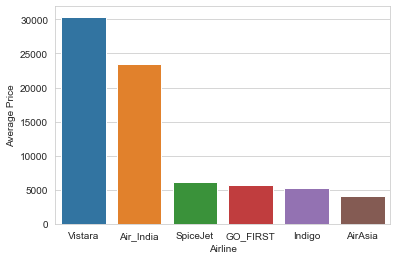

In [10]:
avg_price = Dataset.groupby('airline')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price',ascending=False)
sns.barplot(x='airline', y='price', data=avg_price)


plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

Number of passengers in Economy and Business Class

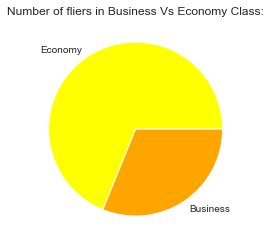

In [11]:
class_counts = Dataset['class'].value_counts()
colors = ['Yellow', 'Orange']
class_counts.plot(kind='pie', colors=colors)
plt.title("Number of fliers in Business Vs Economy Class:")
plt.ylabel('')
plt.show()

Ticket Prices based on Class

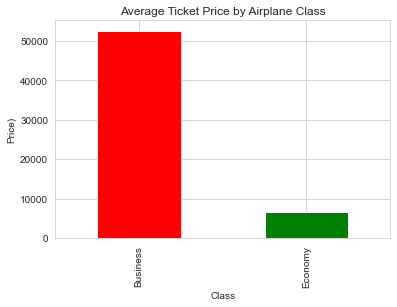

In [12]:
class_prices = Dataset.groupby('class')['price'].mean()
sns.set_style("whitegrid")
class_prices.plot(kind='bar', color=['Red', 'Green'])
plt.title("Average Ticket Price by Airplane Class")
plt.xlabel("Class")
plt.ylabel("Price)")
plt.show()

Ticket Prices Based on duration of Flights

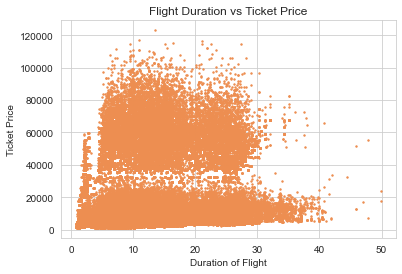

In [13]:
plt.scatter(Dataset['duration'], Dataset['price'], s=2, color= '#ed8e51')

plt.title("Flight Duration vs Ticket Price")
plt.xlabel("Duration of Flight")
plt.ylabel("Ticket Price")
plt.show()

Relation between number of stops for a flight and the flight ticket price

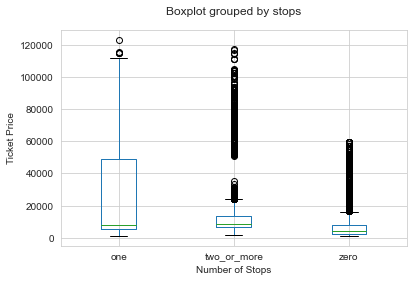

In [14]:
# Creating box plot of number of stops vs ticket price
Dataset.boxplot(column='price', by='stops')

plt.title("")
plt.xlabel("Number of Stops")
plt.ylabel("Ticket Price")
plt.show()

Identifying the Categorical Columns

In [15]:
# capturing those of type *object*

cat_cols = list(Dataset.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 7
Categorical columns:
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


Performing target encoding for all the categorical variable

In [16]:
import category_encoders as ce

te = ce.TargetEncoder(cols=cat_cols)
Dataset = te.fit_transform(Dataset, Dataset['price'])

In [17]:
Dataset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,6179.278881,18951.326639,21232.361894,9375.938535,21586.758341,21372.529469,6572.342383,2.17,1,5953
1,6179.278881,18951.326639,20370.676718,9375.938535,22231.076098,21372.529469,6572.342383,2.33,1,5953
2,4091.072742,18951.326639,20370.676718,9375.938535,14993.139521,21372.529469,6572.342383,2.17,1,5956
3,30396.536302,18951.326639,21630.760254,9375.938535,18494.598993,21372.529469,6572.342383,2.25,1,5955
4,30396.536302,18951.326639,21630.760254,9375.938535,22231.076098,21372.529469,6572.342383,2.33,1,5955


Identifying Numerical Columns

In [18]:
numeric_cols = Dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


Scaling Data

In [19]:
# Min Max Scaler: transformation of data

names = Dataset.columns
indexes = Dataset.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
Dataset = sc.fit_transform(Dataset)
data_scaled = pd.DataFrame(Dataset, columns=names, index=indexes)
data_scaled.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.079383,0.0,0.867088,0.0,0.876048,0.833363,0.0,0.027347,0.0,0.039749
1,0.079383,0.0,0.804496,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039749
2,0.000000,0.0,0.804496,0.0,0.315340,0.833363,0.0,0.027347,0.0,0.039773
3,1.000000,0.0,0.896027,0.0,0.613097,0.833363,0.0,0.028980,0.0,0.039765
4,1.000000,0.0,0.896027,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039765


In [20]:
# Set 'price' as the target variable
y = data_scaled['price']

# Extract the input features
X_data = data_scaled.drop(['price'], axis=1)

#Using Pearson Correlation

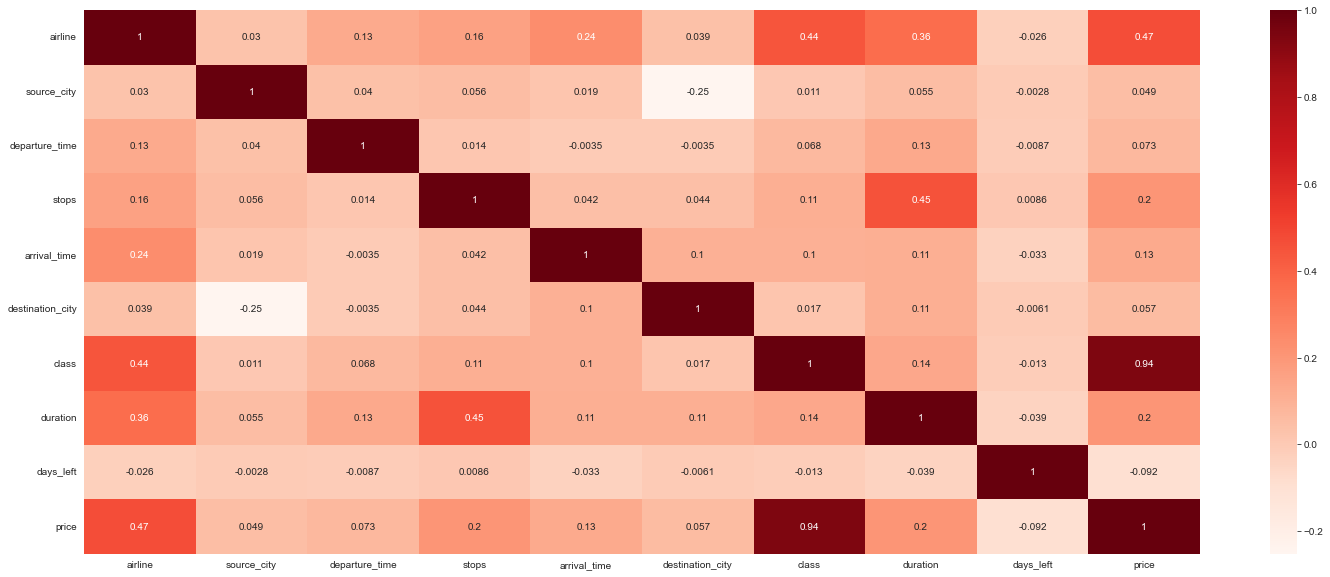

In [21]:
plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [22]:
#Correlation with target variable price
cor_target = abs(cor["price"])

relevant_features = cor_target
relevant_features 

airline             0.471865
source_city         0.049099
departure_time      0.072732
stops               0.203405
arrival_time        0.128853
destination_city    0.056619
class               0.937860
duration            0.204222
days_left           0.091949
price               1.000000
Name: price, dtype: float64

In [23]:
#Using KBest Selection

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
X_important = selector.fit_transform(X_data, y)

# Get a boolean mask of the selected features
mask = selector.get_support()

# Create a list of the selected feature names
important_feature_names = X_data.columns[mask]

print(important_feature_names)

Index(['airline', 'source_city', 'destination_city', 'class'], dtype='object')


In [24]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)


Descision Tree

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Convert the continuous target variable to binary classes
y_train_binary = np.where(y_train > np.median(y_train), 1, 0)
y_test_binary = np.where(y_test > np.median(y_train), 1, 0)

# Fit the decision tree classifier model
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train_binary)

# Make predictions and evaluate the model
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test_binary, y_pred_dt)

print('Decision tree Classifier accuracy: {}%'.format(dt_accuracy * 100))

Decision tree Classifier accuracy: 96.61508220752611%


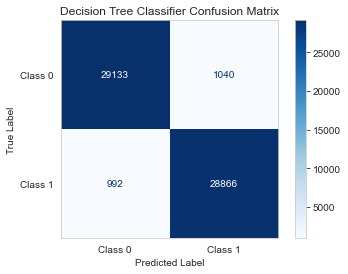

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     30173
           1       0.97      0.97      0.97     29858

    accuracy                           0.97     60031
   macro avg       0.97      0.97      0.97     60031
weighted avg       0.97      0.97      0.97     60031



In [49]:
# Generate the confusion matrix
cm_dt = confusion_matrix(y_test_binary, y_pred_dt)

# Create the ConfusionMatrixDisplay object
cm_display_dt = ConfusionMatrixDisplay(cm_dt, display_labels=['Class 0', 'Class 1'])

# Plot the confusion matrix
cm_display_dt.plot(cmap='Blues')

# Add titles and axis labels
plt.title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.grid(False)
plt.show()

# Generate the classification report
report_dt = classification_report(y_test_binary, y_pred_dt)

# Print the classification report
print("Decision Tree Classifier Classification Report:")
print(report_dt)


Logistic Regression 

In [44]:
from sklearn.linear_model import LogisticRegression

# Convert the continuous target variable to binary classes
y_train_binary = np.where(y_train > np.median(y_train), 1, 0)
y_test_binary = np.where(y_test > np.median(y_train), 1, 0)

# Fit the logistic regression model
clf_Logistic = LogisticRegression().fit(X_train, y_train_binary)

# Make predictions and evaluate the model
prediction_lr = clf_Logistic.predict(X_test)
lr_accuracy = accuracy_score(y_test_binary, prediction_lr)

print('Logistic Regression accuracy: {}%'.format(lr_accuracy * 100))


Logistic Regression accuracy: 90.05180656660725%


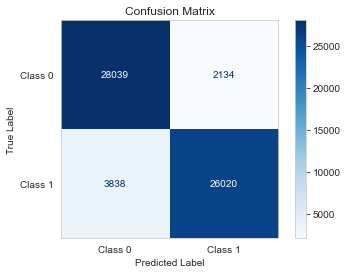

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     30173
           1       0.92      0.87      0.90     29858

    accuracy                           0.90     60031
   macro avg       0.90      0.90      0.90     60031
weighted avg       0.90      0.90      0.90     60031



In [46]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_binary, prediction_lr)

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])

# Plot the confusion matrix
cm_display.plot(cmap='Blues')

# Add titles and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.grid(False)
plt.show()

# Generate the classification report
report_lr = classification_report(y_test_binary, prediction_lr)

# Print the classification report
print("Classification Report:")
print(report_lr)

Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Define the bin edges
bin_edges = np.linspace(y_train.min(), y_train.max(), num=10)

# Use the bin edges to transform the continuous target variable into a categorical variable
y_train_cat = np.digitize(y_train, bin_edges)
y_test_cat = np.digitize(y_test, bin_edges)

# Train and evaluate the classifier on the categorical target variable
clf = RandomForestClassifier().fit(X_train, y_train_cat)
prediction_rf = clf.predict(X_test)
accuracy = accuracy_score(y_test_cat, prediction_rf) * 100
print('Random Forest Classifier accuracy: {}%'.format(accuracy))

Random Forest Classifier accuracy: 93.9164764871483%


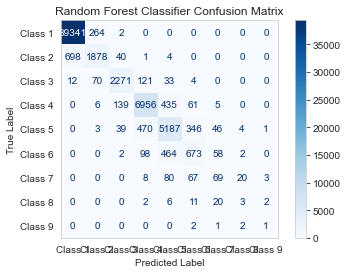

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99     39607
           2       0.85      0.72      0.78      2621
           3       0.91      0.90      0.91      2511
           4       0.91      0.92      0.91      7602
           5       0.84      0.85      0.84      6096
           6       0.58      0.52      0.55      1297
           7       0.35      0.28      0.31       247
           8       0.10      0.07      0.08        44
           9       0.14      0.17      0.15         6

    accuracy                           0.94     60031
   macro avg       0.63      0.60      0.61     60031
weighted avg       0.94      0.94      0.94     60031



In [58]:
# Generate the confusion matrix
cm_rf = confusion_matrix(y_test_cat, prediction_rf)

# Create the ConfusionMatrixDisplay object
cm_display_rf = ConfusionMatrixDisplay(cm_rf, display_labels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'])

# Plot the confusion matrix
cm_display_rf.plot(cmap='Blues')

# Add titles and axis labels
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.grid(False)
plt.show()

# Generate the classification report
report_rf = classification_report(y_test_cat, prediction_rf)

# Print the classification report
print("Random Forest Classifier Classification Report:")
print(report_rf)